# Physics 444 Problem Set #6

In [1]:
import numpy as np
import scipy as sp
import scipy.interpolate
from scipy.integrate import quad

from astropy import units as u
from astropy import constants as c

import matplotlib.pyplot as plt

from progressbar import ProgressBar

In [2]:
from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'dejavuserif'
rcParams['font.family'] = 'serif'
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['axes.grid']=True
rcParams['axes.titlesize']=24
rcParams['axes.labelsize']=20
rcParams['axes.titlepad']=15
rcParams['legend.frameon'] = True
rcParams['legend.facecolor']='white'
rcParams['legend.fontsize']=18

# Q1(a-c)

In [3]:
H0 = 67.8 *u.km/u.s/u.Mpc
wr0 = 9.03*10**(-5)
wm0 = 0.306
wl0 = 0.692
w0 = 1

def t(a):
    result = 1/ (H0*(np.sqrt(wr0*a**(-2.) + wm0*a**(-1.) + wl0*a**2. + (1-w0))))
    return result.to(u.yr).value


def cosmo(wr0): 
    
   
    
    # Q1(a)
    def t0(H0,wm0):
        result = 2. * H0**(-1.) * np.log((np.sqrt(1.-wm0)+1.) / np.sqrt(wm0)) / (3.*np.sqrt(1.-wm0))
        return result.to(u.Gyr)

    print ('t0 =',t0(H0,wm0))

    # Q1(b)
    
    def t_int(a):
        result = quad(t,0,a)[0]
        return result
    p = ProgressBar()
    a_list = np.logspace(-5,10,100)
    t_list = np.array([t_int(a) for a in p(a_list)])

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    ax.set_xlabel('t (yr)',fontsize = 20)
    ax.set_ylabel('a',fontsize = 20)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(1e3,4e11)
    ax.plot(t_list,a_list)
    plt.show()

    z_list = (1/a_list) - 1

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    ax.set_xlabel('t (yr)')
    ax.set_ylabel('z')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(1e3,4e11)
    ax.plot(t_list,z_list)
    plt.show()

    # Q1(c)

    print('age of the universe = ', t_int(1), 'years')
    return a_list,t_list

t0 = 13.827066203492155 Gyr


100% |########################################################################|


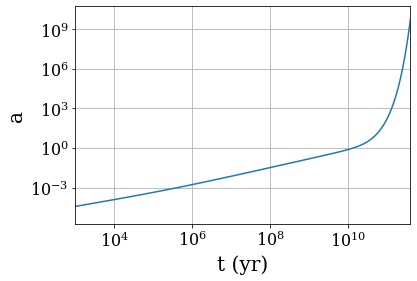

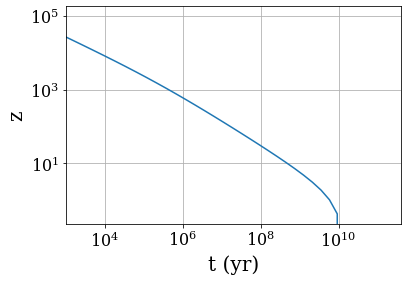

age of the universe =  13827244193.955175 years


In [4]:
a_list,t_list = cosmo(9.03*10**(-5))

# Q1(d)

t0 = 13.827066203492155 Gyr


100% |########################################################################|


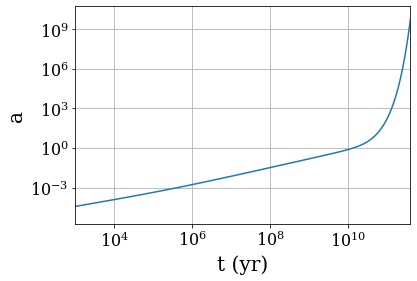

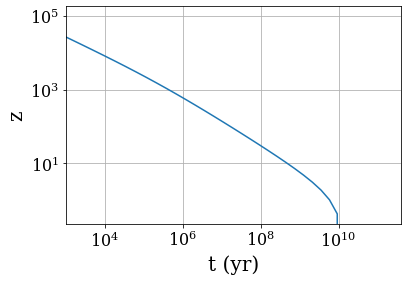

age of the universe =  13827244193.955175 years


In [5]:
_,_ = cosmo(0)

In [6]:
print('difference in age of the universe = ', 13827244193.955175 - 13833142418.74652, 'years')

difference in age of the universe =  -5898224.791343689 years


# Q1(e)

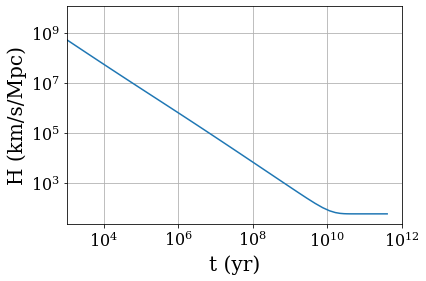

In [7]:
# H(t)=adot/a

da = a_list[1:]-a_list[:-1]
dt = t_list[1:]-t_list[:-1]
mida = (a_list[1:]+a_list[:-1])/2
midt = (t_list[1:]+t_list[:-1])/2
H = ((da)/(mida * dt) / u.yr).to(u.km/u.s/u.Mpc)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('t (yr)')
ax.set_ylabel('H (km/s/Mpc)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e3,1e12)
ax.plot(midt,H)
plt.show()

# The cosmological constant begins to dominate

# Q1(f)

In [8]:
def r(z):
    result = z*c.c/H
    return result.to(u.Mpc)

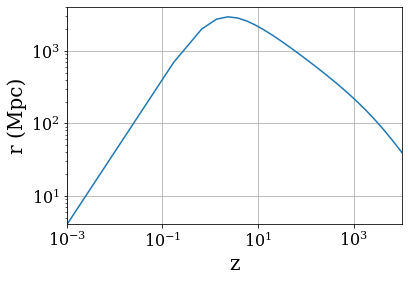

In [9]:
z_list = (1/mida) - 1
r_list = r(z_list)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('z')
ax.set_ylabel('r (Mpc)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e-3,1e4)
ax.plot(z_list,r_list)

# Q2(a)

In [10]:
def omegaw(omegaw0,z,w):
    result = omegaw0*(1.+z)**(3.+3.*w)
    return result

# density parameter for radiation
print ('density parameter for radiation = {0:0.4e}'.format(omegaw(9.03*10**(-5),1100.,(1/3))))

# density parameter for matter
print ('density parameter for matter = {0:0.4e}'.format(omegaw(0.306,1100.,0)))

# density parameter for cosmological constant
print ('density parameter for cosmological constant = {0:0.4e}'.format(omegaw(0.692,1100.,-1.)))


density parameter for radiation = 1.3269e+08
density parameter for matter = 4.0840e+08
density parameter for cosmological constant = 6.9200e-01


# Q2(b)

In [11]:
def T(T0,z):
    result = T0*(1+z)
    return result.to(u.K)

print('T(z=1100) = ',T(2.725*u.K,1100.))

T(z=1100) =  3000.225 K


# Q2(c)

In [12]:
def a(z):
    result = (1.+z)**(-1.)
    return result

print ('t(z=1100) = {0:0.4e}'.format(t(a(1100))),'yr')

t(z=1100) = 6.8261e+08 yr


# Q2(d)

In [13]:
print (r(1100))

[7.32831181e-02 1.46037695e-01 2.90091913e-01 5.73755156e-01
 1.12829103e+00 2.20230178e+00 4.25848757e+00 8.14125108e+00
 1.53603038e+01 2.85633399e+01 5.23205636e+01 9.44329888e+01
 1.68130661e+02 2.95784979e+02 5.15187476e+02 8.90164130e+02
 1.52850377e+03 2.61222430e+03 4.44865541e+03 7.55664845e+03
 1.28120618e+04 2.16932568e+04 3.66952515e+04 6.20279187e+04
 1.04790703e+05 1.76937911e+05 2.98513002e+05 5.02715564e+05
 8.42635170e+05 1.39469559e+06 2.23558479e+06 3.34121468e+06
 4.45366587e+06 5.24021509e+06 5.64230327e+06 5.80899997e+06
 5.87144025e+06 5.89388832e+06 5.90183678e+06 5.90463589e+06
 5.90561973e+06 5.90596530e+06 5.90608665e+06 5.90612926e+06
 5.90614422e+06 5.90614948e+06 5.90615132e+06 5.90615197e+06
 5.90615219e+06 5.90615227e+06 5.90615230e+06 5.90615231e+06
 5.90615232e+06 5.90615232e+06 5.90615232e+06 5.90615232e+06
 5.90615232e+06 5.90615232e+06 5.90615232e+06 5.90615232e+06
 5.90615232e+06 5.90615232e+06 5.90615232e+06 5.90615232e+06
 5.90615232e+06 5.906152

# Q2(e)